In [1]:
from RawHandler.RawHandlerRawpy import RawHandlerRawpy
from RawHandler.utils import download_file_requests
import matplotlib.pyplot as plt
import os

In [ ]:
# Download example raw files
def download_file_if_needed(file_url, output_file):
    if not os.path.exists(output_file):
        download_file_requests(file_url, output_file)


file_url = "https://dataverse.uclouvain.be/api/access/datafile/:persistentId?persistentId=doi:10.14428/DVN/DEQCIM/N9OG4V"
output_file = "wall.raf"
download_file_if_needed(file_url, output_file)

: 

In [2]:
# Load the first image
rh = RawHandlerRawpy("wall.raf", colorspace="sRGB")

File format not recognized.


(3, 3296, 4934)
(3, 3296, 4934)


/Users/ryanmueller/Develop/RawHandler/src/RawHandler/RawHandlerRawpy.py:69: RuntimeWarning: divide by zero encountered in matmul
  transformed = (rgb_to_xyz @ xyz_linear.reshape(3, -1)).reshape(orig_dims)
/Users/ryanmueller/Develop/RawHandler/src/RawHandler/RawHandlerRawpy.py:69: RuntimeWarning: overflow encountered in matmul
  transformed = (rgb_to_xyz @ xyz_linear.reshape(3, -1)).reshape(orig_dims)
/Users/ryanmueller/Develop/RawHandler/src/RawHandler/RawHandlerRawpy.py:69: RuntimeWarning: invalid value encountered in matmul
  transformed = (rgb_to_xyz @ xyz_linear.reshape(3, -1)).reshape(orig_dims)


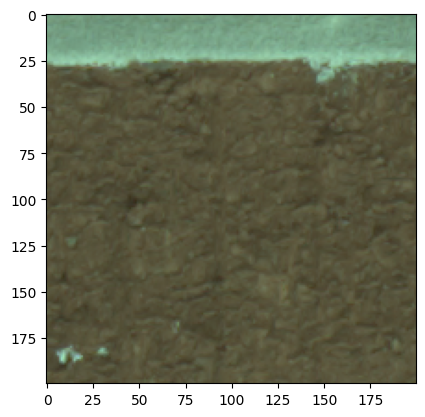

In [3]:
# This wraps rawpy's postprocess method and gives an XYZ colorspace image
dims = (1800, 1800 + 200, 2700, 2700 + 200)
linear = rh._input_handler(dims=dims)
plt.imshow(linear.transpose(1, 2, 0) ** (1 / 2.2))

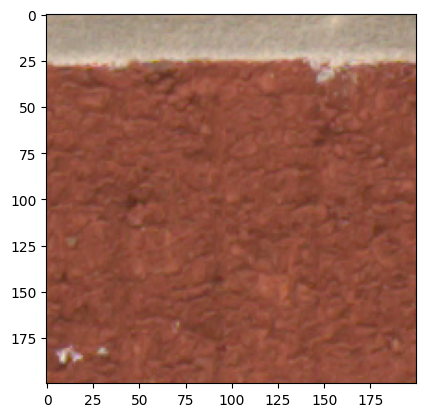

In [16]:
# This gives a color space transformed image
dims = (1800, 1800 + 200, 2700, 2700 + 200)
linear = rh.apply_colorspace_transform(dims=dims, clip=True)
plt.imshow(linear.transpose(1, 2, 0) ** (1 / 2.2))

(0.0, 0.802703318942944)

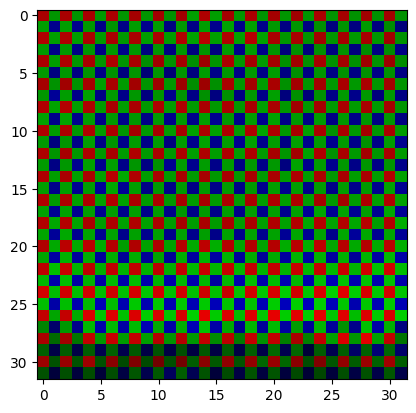

In [17]:
# We can also simulate a sparse representation
dims = (1800, 1800 + 32, 2700, 2700 + 32)

rgb = rh.as_sparse(dims=dims, pattern="RGGB", cfa_type="bayer")
plt.imshow((rgb).transpose(1, 2, 0) ** (1 / 2.2))
rgb.min(), rgb.max()

(0.032692937366009714, 0.802703318942944)

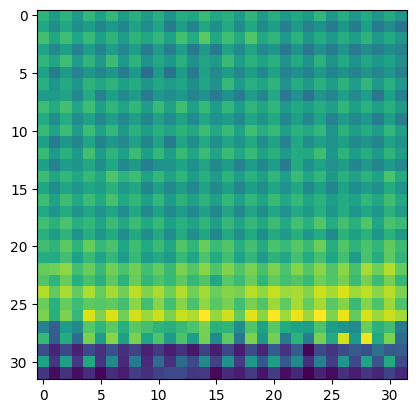

In [18]:
# Or a simulate a CFA
rgb = rh.as_cfa(dims=dims, pattern="RGGB", cfa_type="bayer")
plt.imshow((rgb).transpose(1, 2, 0) ** (1 / 2.2))
rgb.min(), rgb.max()

(0.0, 0.83044641200168257)

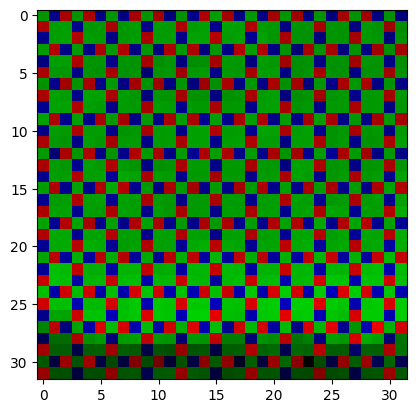

In [19]:
# We can also simulate a sparse representation of an x-trans CFA
dims = (1800, 1800 + 32, 2700, 2700 + 32)

rgb = rh.as_sparse(dims=dims, cfa_type="xtrans", clip=True)
plt.imshow((rgb).transpose(1, 2, 0) ** (1 / 2.2))
rgb.min(), rgb.max()

(0.0, 0.83044641200168257)

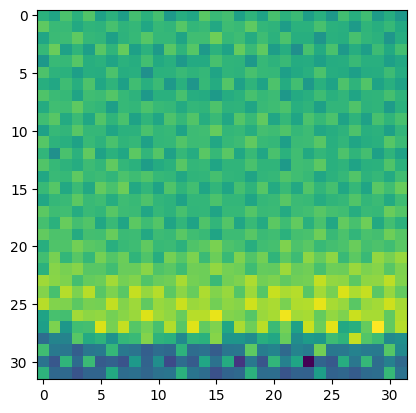

In [20]:
# Or a simulate an x-trans CFA
rgb = rh.as_cfa(dims=dims, cfa_type="xtrans", clip=True)
plt.imshow((rgb).transpose(1, 2, 0) ** (1 / 2.2))
rgb.min(), rgb.max()

(0.0, 0.83044641200168257, (3, 30, 30))

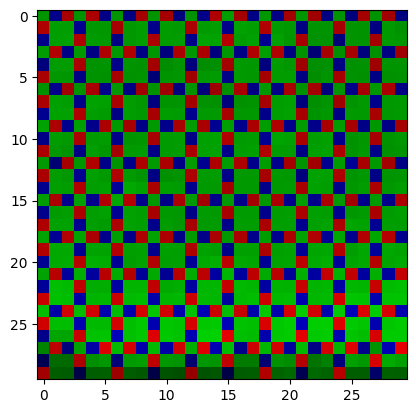

In [21]:
# We can also set it so that it always crops a multiple of the shape of the CFA array
dims = (1801, 1800 + 32, 2701, 2700 + 32)

rgb = rh.as_sparse(dims=dims, cfa_type="xtrans", clip=True, safe_crop=6)
plt.imshow((rgb).transpose(1, 2, 0) ** (1 / 2.2))
rgb.min(), rgb.max(), rgb.shape

In [22]:
from RawHandler.RawHandler import CoreRawMetadata, BaseRawHandler

In [26]:
import numpy as np

core_metadata = CoreRawMetadata(
    black_level_per_channel=[0, 0, 0, 0],
    white_level=65535,
    rgb_xyz_matrix=rh.rawpy_object.rgb_xyz_matrix,
    raw_pattern=[[0, 1], [1, 2]],
    camera_white_balance=np.array(rh.rawpy_object.camera_whitebalance),
    iheight=rh.rawpy_object.sizes.iheight,
    iwidth=rh.rawpy_object.sizes.iwidth,
)
bayer_sim = (rh.as_cfa(colorspace="camera") * 65535).astype(np.float16)[0]

/Users/ryanmueller/Develop/RawHandler/src/RawHandler/RawHandlerRawpy.py:125: RuntimeWarning: divide by zero encountered in matmul
  transformed = (rgb_transform @ xyz_linear.reshape(3, -1)).reshape(orig_dims)
/Users/ryanmueller/Develop/RawHandler/src/RawHandler/RawHandlerRawpy.py:125: RuntimeWarning: overflow encountered in matmul
  transformed = (rgb_transform @ xyz_linear.reshape(3, -1)).reshape(orig_dims)
/Users/ryanmueller/Develop/RawHandler/src/RawHandler/RawHandlerRawpy.py:125: RuntimeWarning: invalid value encountered in matmul
  transformed = (rgb_transform @ xyz_linear.reshape(3, -1)).reshape(orig_dims)
/var/folders/sp/dl2n2l_50393llxnz5xnp4v80000gn/T/ipykernel_3503/1961604877.py:11: RuntimeWarning: overflow encountered in cast
  bayer_sim = (rh.as_cfa(colorspace='camera')*65535).astype(np.float16)[0]


In [27]:
brh = BaseRawHandler(
    bayer_sim, core_metadata, full_metadata=rh.full_metadata, colorspace="sRGB"
)

/Users/ryanmueller/Develop/RawHandler/src/RawHandler/RawHandler.py:160: RuntimeWarning: divide by zero encountered in matmul
  transformed = (rggb_transform @ rggb.reshape(4, -1)).reshape(orig_dims)
/Users/ryanmueller/Develop/RawHandler/src/RawHandler/RawHandler.py:160: RuntimeWarning: overflow encountered in matmul
  transformed = (rggb_transform @ rggb.reshape(4, -1)).reshape(orig_dims)
/Users/ryanmueller/Develop/RawHandler/src/RawHandler/RawHandler.py:160: RuntimeWarning: invalid value encountered in matmul
  transformed = (rggb_transform @ rggb.reshape(4, -1)).reshape(orig_dims)
/Users/ryanmueller/Develop/RawHandler/src/RawHandler/utils.py:214: RuntimeWarning: invalid value encountered in power
  return np.where(x <= 0.0031308, 12.92 * x, (1 + a) * np.power(x, 1 / 2.4) - a)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.427238296445..0.999719224117].


(-0.033067979600987764, 0.99936138712280131)

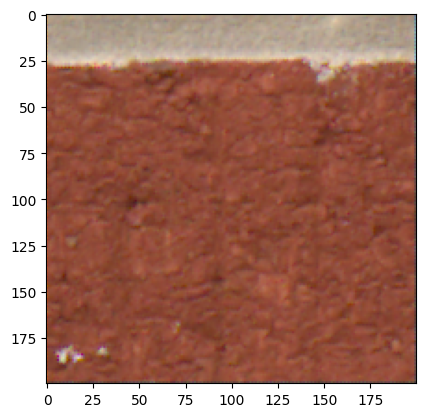

In [30]:
# To draw an demosaiced rgb image, we can use as_rgb, which returns an image with dimensions C, H, W. We also can apply a gamma curve.
from RawHandler.utils import linear_to_srgb

dims = (1800, 1800 + 200, 2700, 2700 + 200)

rgb = brh.as_rgb(dims=dims)
plt.imshow(linear_to_srgb(rgb).transpose(1, 2, 0))
rgb.min(), rgb.max()